# Does Social Need Drive Equitable Economic Development Decisions?

# Eric Stokan

# Date: 12-14-21



In [1]:
#import modules
import pandas as pd #I use this to read in, organize, transform, and analyze the data for this project
import numpy as np # This can help with calculations and simulations
import matplotlib.pyplot as plt #This package helps with visualizations
from matplotlib import pyplot
import os #Allows the program to find files on the computer.


import statsmodels.formula.api as smf #Using for a basic OLS model
import statsmodels.api as sm #Use for eventual regression model
from statsmodels.stats.anova import anova_lm #I use this for doing the anova for overall model fit
import seaborn as sns # I use this for visualizations
from pandas.plotting import scatter_matrix



In [2]:
#I was moving a bunch of columns above, so I decided to write a function to do this since I have several more to move.
def MoveCol(data, var):
    col1= data.pop(var)
    data.insert(0, var, col1)


# Project Motivation and Description

Local governments must balance competing priorities of economic growth, equity, and sustainability.  Of course, it has long been acknowledged that state and local governments compete over economic growth and development (Peterson, 1981; 2012; Stone, 1989; Wolman and Spitzley, 1996). To that end, they often utilize a broad range of policy instruments (Reese, 1993; Rubin, 1988; Rubin and Rubin, 1987; Stokan, 2013; Zheng and Warner, 2010). Yet, what drives local governments toward greater commitments to social equity is less certain and has garnered less scholarly attention. Public administration, for instance, has struggled for more than 50 years with its normative goal of developing social equity as an equally important pillar, on par with economic growth and efficiency (Frederickson, 1971).

With a newly created dataset merging the U.S. Department of Housing and Urban Development (HUD) Community Development Block Grant (CDBG) expenditures, with the Centers for Disease Control and Prevention (CDC) Social Vulnerability Index (SVI) measures, to several waves of the International City/County Management Association (ICMA) economic development surveys (1999, 2004, 2009, 2014), this project seeks to explain whether social need drives local governments toward equity-oriented policies. It account for both median tract-level social need as well as variation in social need within the city.  It finds that both pathways are important, and the join combination of the two result in an improved explanation for why local governments pursue equity-oriented policies. 


# Data Sources

In this section I outline my data sources.

Data Sources:
1.	**ICMA Economic development survey 1999, 2004, 2009, 2014**  
a.	Website: https://bookstore.icma.org/categories.aspx?Keyword=economic%20development%20dataset  
b.	Description: These data include information on economic development practices, barriers to economic development, participants in the economic development process, motivations for economic development pursuits, and government structure.  
c.	Cost: These are the only pay data- but there is no other longitudinal source of economic development data.  All others are free and public data.  
d.	Legality: Free to use once paid for, but not available to provide to others except when working jointly on a project.   
  
2.	**CDC SVI**  
a.	Website:(https://www.atsdr.cdc.gov/placeandhealth/svi/data_documentation_download.html)\  
b.	Description: This site includes data from the Centers for Disease Control and Prevention at the tract and counties level.    I have already collected the tract level data, connected it with the cities in my sample, and merged it into a final set.     
c.	Cost: These data are free at the website attached.  
d.	Legality: These data are for public use.    
  
3.	**US Census Bureau (Decennial -2000, imputed for 2004, and ACS for 2009 and 2014)**  
a.	Website: Decennial API (https://www.census.gov/data/developers/data-sets/decennial-census.html) and ACS API (https://www.census.gov/data/developers/data-sets/acs-1year.html)\     
b.	Description: This site includes data from the Centers for Disease Control and Prevention at the tract and counties level.    I have already collected the tract level data, connected it with the cities in my sample, and merged it into a final set.   
c.	Cost: These data are free at the website attached.  
d.	Legality: These data are for public use.    
  
4.	**US Census Bureau (Government finance data)**  
a.	Website: General website (https://www.census.gov/data/tables/2012/econ/gov-finances/summary-tables.html).  Through a contact at Census, I was able to get the entire historical dataset going back to the 1940s and filter what I needed.  The organization data also come from these departments.     
b.	Description: These data include government finance information on total revenues (own source and intergovernmental transfers) as well as itemized revenues and expenditures as well as debt obligations and other assets.   
c.	Cost: These data are free.  
d.	Legality: These data are for public use.  
  
5.	**HUD CDBG Data**  
a.	Website: (JSON/API) https://opendata.arcgis.com/datasets/95f6f0ceb41c4106b9854f006764c188_0.geojson\  	
b.	Description: These data include municipal HUD Community Development Block Grant data on expenditures.  The program is administered by the US Department of Housing and Urban Development, but the municipalities have great latitude in how and where they spend these dollars.   
c.	Cost: These data are free at the website attached.  
d.	Legality: These data are for public use.



In [3]:
#I use the pandas library to read in the CSV
# Laptop= df= pd.read_csv(r'C:\\Users\\ericj\\OneDrive\\Documents\\DataScience\\Homework\\ICMA2CDBG.csv')
#Home computer
df= pd.read_csv(r'C:\\Users\\Computer\\Documents\\Data Science Course\\Homework\\ICMA2CDBG.csv')


# Data Inspection

In this section I simply start inspecting my data to ensure things inputted correctly. 

In [4]:
#The shape command, provides me with the number of rows (717) and number of columns (3,213)
df.shape

(3213, 717)

In [5]:
#I want to see the size of the overall file. 
fileSize = os.path.getsize('C:\\Users\\Computer\\Documents\\Data Science Course\\Homework\\ICMA2CDBG.csv')
print(fileSize)

9513791


In [6]:
#To view a full list of all of the data that I am working with, I iterate through the column list. 
for col in df.columns:
    print(col)

year
imisid
ujuris
totalexpendamt
ustate
placefips
geoid
cbsaname
cbsa
id
govtype
countyarea
countyfips
stateab
county
censusregion
imputedrecord
hfrag2
vfrag
hfragsimple
generalpurposetotal
specialpurposetotal
medianagex
hhanyincomex
hhincomeunder10kx
hhincome10k15kx
hhincome15k20kx
hhincome20k25kx
hhincome25k29kx
hhincome30k35kx
hhincome35k40kx
hhincome40k45kx
hhincome45k50kx
hhincome50k60kx
hhincome60k75kx
hhincome75k100kx
hhincome100k125kx
hhincome125k150kx
hhincome150k200kx
hhincome200kmorex
medianhhincomex
percapincomex
homesx
medianstructureagex
leadownerpctx
leadrenterpctx
highschoollesspctx
bachelorsmorepctx
renterpctx
whitepctx
blackpctx
belowpovertypctx
maxmicroentassist
maxrehabmulti
maxpubserv
maxyouth
maxsenior
maxdisabled
maxtransport
maxlegal
maxcrime
maxhealth
maxstreet
maxedfinassist
maxinterim
maxneighborhoodfac
maxparks
maxnonreshistoric
maxhomeless
maxsubsistence
maxemptrain
maxchildcareserv
maxseniorcenters
maxpubfac
maxmental
maxchildcarefac
maxdisabledcenters
ma

In [7]:
#I want to reduce the number of variables that I am working with. 
df1= df[['year', 'imisid', 'ujuris', 'ustate', 'hfrag2', 'hfragsimple', 'vfrag', 
         'whitepctx', 'blackpctx', 'belowpovertypctx', "mediant1x", "mediant2x", "mediant3x", "mediant4x", 'mediant', 'ginitx', 
         'ufog', 'ta', 'tc', 'tif','training', 'cdc', "cdloan", 'childcare', 'growth', 'equity',
         'populationx', 'ln_pop', 'metropop', 'totalrevownsources', 'totrevpercap', 'propertytax', 
         "renterpctx", 'totaligrevenue','medianhhincomex', 'totalexpendamt', 'development_es', 'redistributive_es',
         'post', "treated", 'didnew', 'diddosage', 'totalexpenditure', 
         'all_participate','private_participate', 'public_participate']]

In [8]:
#I inspect the first few rows of my data. 
df1.head()

,year,imisid,ujuris,ustate,hfrag2,hfragsimple,vfrag,whitepctx,blackpctx,belowpovertypctx,...,development_es,redistributive_es,post,treated,didnew,diddosage,totalexpenditure,all_participate,private_participate,public_participate
0,1999,101641,Town of Ashland,25,0.982268,0.870733,0.448276,0.025341,0.001286,0.066623,...,0.0,0.0,0.0,0,NaN,NaN,44565.418,0.292906,0.153670,0.050671
1,2009,101641,Town of Ashland,25,0.994200,0.793913,0.230769,0.908071,0.125375,0.227491,...,0.0,0.0,0.0,0,0.0,0.0,60718.680,0.286134,0.061293,0.101218
2,2014,101661,Town of Concord,25,0.986480,0.030186,0.718284,0.851622,0.027290,0.110335,...,0.0,0.0,0.0,0,0.0,0.0,49313.000,0.408366,0.226379,0.200716
3,1999,102072,Town of Mansfield,25,0.983130,1.187969,0.307692,0.042015,0.004348,0.248960,...,0.0,0.0,0.0,0,NaN,NaN,90972.453,0.257541,0.061293,0.050671
4,2014,102072,Town of Mansfield,25,0.986490,0.301076,0.352941,0.822598,0.101424,0.087998,...,0.0,0.0,0.0,0,0.0,0.0,38000.395,0.388275,0.153670,0.244645


In [9]:
#Just want to scope a few things out so will take a look at the largest values in terms of those cities that are spending the most. 
df1.nlargest(10, 'totalexpenditure')

,year,imisid,ujuris,ustate,hfrag2,hfragsimple,vfrag,whitepctx,blackpctx,belowpovertypctx,...,development_es,redistributive_es,post,treated,didnew,diddosage,totalexpenditure,all_participate,private_participate,public_participate
2820,2014,205108,City and County of San Francisco,6,0.963403,0.067564,0.857143,0.494824,0.057427,0.130662,...,0.23,0.78,NaN,1,NaN,NaN,7859649.0,0.559369,0.317077,0.632801
448,2014,156025,City of San Antonio,48,0.920595,0.031292,0.631579,0.770550,0.067960,0.197846,...,0.49,0.50,0.0,1,0.0,0.0,4169254.0,0.391237,0.086710,0.305701
2533,2009,202708,City of Phoenix,4,0.867997,0.083820,0.746377,0.767314,0.055328,0.180124,...,0.46,0.42,0.0,1,0.0,0.0,3973449.0,0.635169,0.317077,0.810223
399,2009,153089,City of Dallas,48,0.967763,0.336467,0.465385,0.562477,0.229679,0.214289,...,0.30,0.46,0.0,1,0.0,0.0,3377859.3,0.302939,0.092629,0.050671
2439,2014,200859,City of Austin,48,0.885892,0.021803,0.833333,0.746011,0.077947,0.186205,...,0.18,0.83,0.0,1,0.0,0.0,3002315.0,0.566307,0.226379,0.810223
1589,2004,187667,City of Indianapolis-Marion County,18,0.910678,1.212700,0.287129,0.377583,0.003426,0.210764,...,0.00,0.00,0.0,0,0.0,0.0,2996245.0,0.472857,0.153670,0.632801
2701,2014,204218,City of San Diego,6,0.958646,0.059855,0.883436,0.640642,0.067061,0.153789,...,0.45,0.55,0.0,1,0.0,0.0,2794552.0,0.514816,0.317077,0.391926
2700,1999,204218,City of San Diego,6,0.836691,0.069800,0.856061,0.077279,0.006190,0.141029,...,0.58,0.24,NaN,1,NaN,NaN,2649883.0,0.357758,0.061293,0.310280
2438,2004,200859,City of Austin,48,0.969556,0.362111,0.687898,0.018126,0.001512,0.143627,...,0.37,0.62,NaN,1,NaN,NaN,2628248.0,0.321161,0.153670,0.101218
447,1999,156025,City of San Antonio,48,0.967146,0.339329,0.513274,0.066230,0.006857,0.169263,...,0.17,0.81,NaN,1,NaN,NaN,2516766.8,0.380418,0.317077,0.050671


# Data Description

In this section, I explore the descriptive statistics for each of my variables and seek to resolve issues that may violate regression assumptions. 

In [10]:
#I want to get some summary statistics across a distribution of values.

df1.describe(include='all')

,year,imisid,ujuris,ustate,hfrag2,hfragsimple,vfrag,whitepctx,blackpctx,belowpovertypctx,...,development_es,redistributive_es,post,treated,didnew,diddosage,totalexpenditure,all_participate,private_participate,public_participate
count,3213.000000,3213.000000,3213,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,...,3213.000000,3213.000000,2484.000000,3213.000000,1918.000000,1.918000e+03,3.213000e+03,3213.000000,3213.000000,3213.000000
unique,NaN,NaN,1795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,City of Springfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2006.695300,190924.210395,NaN,27.124183,0.967061,0.668809,0.532936,0.450801,0.058295,0.120502,...,0.176776,0.231615,0.072866,0.517274,0.094369,2.362169e+04,1.068254e+05,0.352527,0.153266,0.191086
std,5.919728,62017.024787,NaN,16.005792,0.043347,0.785740,0.202207,0.367609,0.117285,0.071985,...,0.330938,0.375300,0.259969,0.499779,0.292418,1.387060e+05,2.813386e+05,0.093632,0.076902,0.178335
min,1999.000000,101641.000000,NaN,1.000000,0.567632,0.005767,0.029412,0.000000,0.000000,0.009349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.278901e+02,0.185991,0.061293,0.021054
25%,1999.000000,173262.000000,NaN,12.000000,0.961704,0.183059,0.380952,0.045188,0.004392,0.063180,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.248307e+04,0.286134,0.061293,0.050671
50%,2009.000000,188114.000000,NaN,26.000000,0.980409,0.417883,0.523810,0.477974,0.012064,0.105756,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,4.339400e+04,0.339155,0.153670,0.139458
75%,2014.000000,200354.000000,NaN,41.000000,0.990919,0.889799,0.689655,0.822598,0.053186,0.164731,...,0.150000,0.380000,0.000000,1.000000,0.000000,0.000000e+00,9.086161e+04,0.418716,0.226379,0.256640


<AxesSubplot:ylabel='Frequency'>

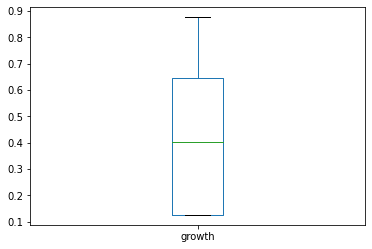

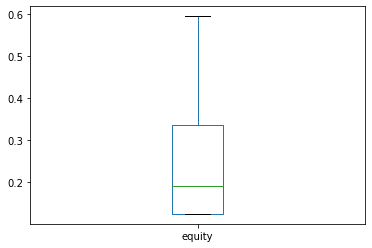

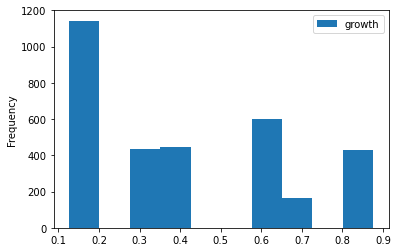

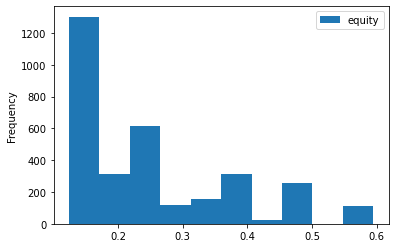

In [11]:
#I start by displaying the distribution of my outcome variables that are continuous in nature
df1[['growth']].plot.box()
df1[['equity']].plot.box()
df1[['growth']].plot.hist()
df1[['equity']].plot.hist()

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

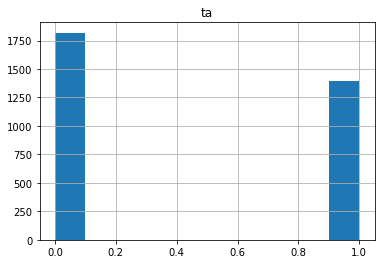

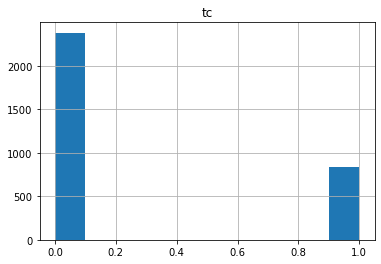

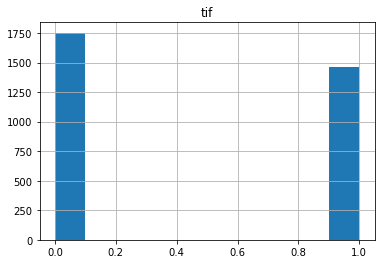

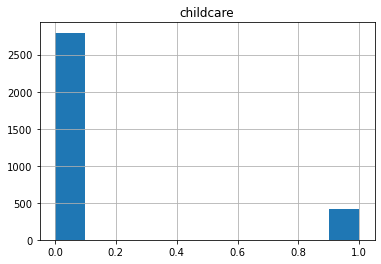

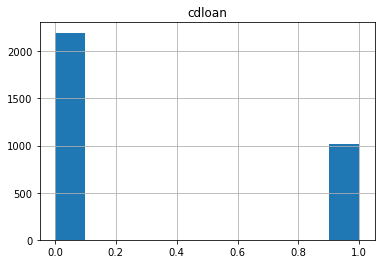

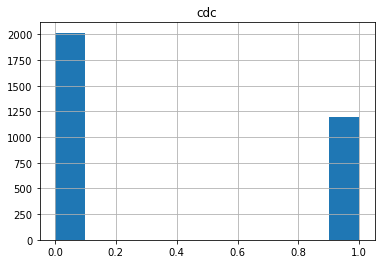

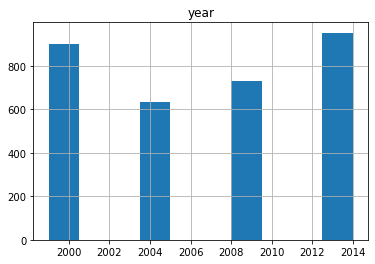

In [12]:
#Next I want to display the distribution of my other outcome measures, but boxplot would not be appropriate
df1[['ta']].hist()
df1[['tc']].hist()
df1[['tif']].hist()
df1[['childcare']].hist()
df1[['cdloan']].hist()
df1[['cdc']].hist()

#Also want to visualize the number by year
df1[['year']].hist()

<AxesSubplot:>

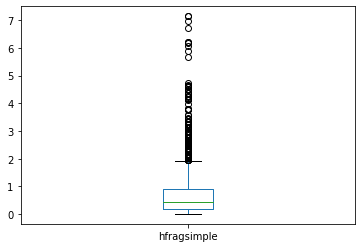

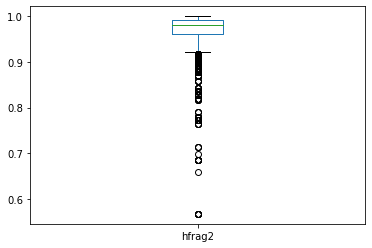

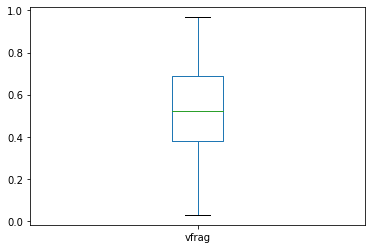

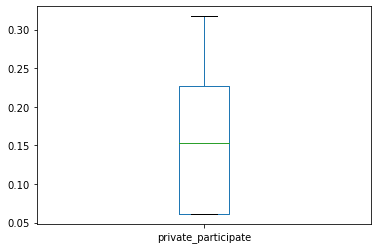

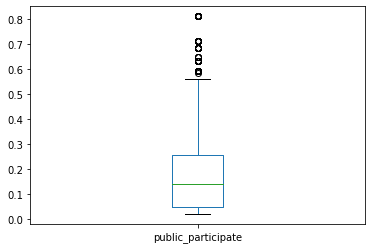

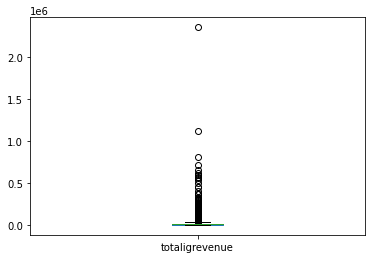

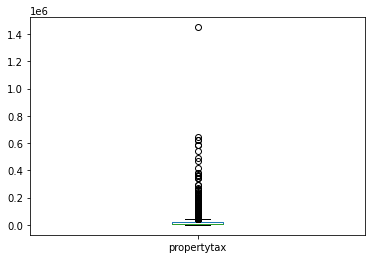

In [13]:
#Now, I move onto some of my core explanatory variables
#RDT Variables
#Deciding between two versions of hfrag
df1[['hfragsimple']].plot.box()
df1[['hfrag2']].plot.box()

df1[['vfrag']].plot.box()
df1[['private_participate']].plot.box()
df1[['public_participate']].plot.box()
df1[['totaligrevenue']].plot.box()
df1[['propertytax']].plot.box()

# Data Transformations

I begin the process of transforming some of my variables to ensure that they do not result in violations of the standard OLS assumptions. 

In [14]:
#From the above, I recognize that I need to log intergovernmental revenues.

#Probably better that I standardize total revownsources on per capita basis. I then assign it to my dataframe.
df1=df1.assign(RevOwnPerCapita= df1.totalrevownsources/df1.populationx)
df1=df1.assign(IGRrevPerCapita= df1.totaligrevenue/df1.populationx)

#I can also create a variable this way. I may want to preserve the natural log.
df1['LogPop']= np.log10(df1['populationx'])
df1['LogPropTax']= np.log10(df1['propertytax'])

df1['LogMetroPop']= np.log10(df1['metropop'])
df1['MetroPopShare']= np.log10(df1['populationx']/df1['metropop'])

C:\Users\Computer\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
#Pull out some of the attributes that I will use to predict committments to equity and growth

NeedAttrib= ["mediant",  "ginitx", 'growth', 'equity'] 

ParticipantAttrib= ['hfrag2', 'vfrag', 'private_participate', 'public_participate', 'growth', 'equity']

FinanceAttrib= ['totaligrevenue','propertytax', 'totalexpendamt', 'growth', 'equity']


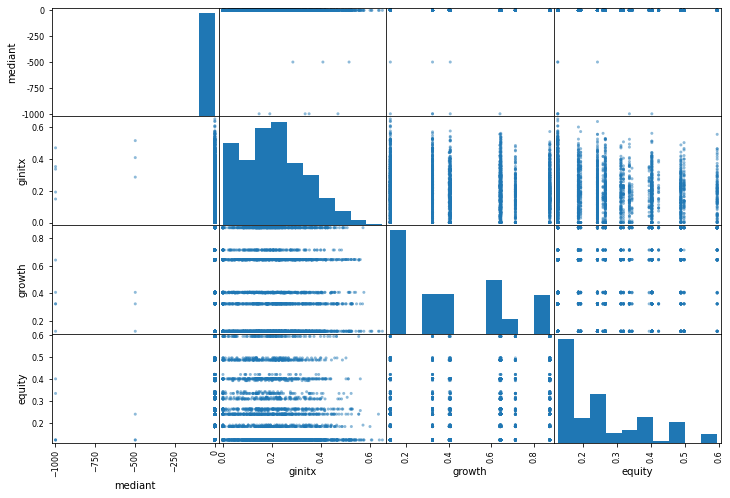

In [16]:
#Scatter of Needs
scatter_matrix(df1[NeedAttrib], figsize= (12, 8)); #The ";" after the command ensures that the attrib text is removed

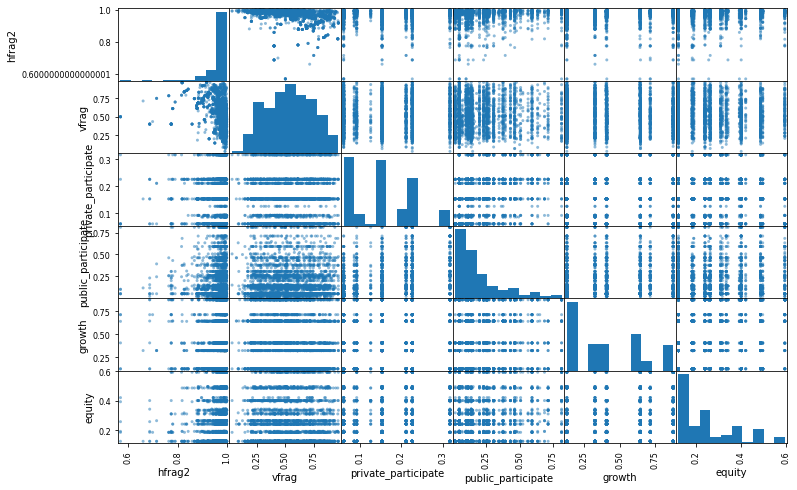

In [17]:
#Scatter of Participants
scatter_matrix(df1[ParticipantAttrib], figsize= (12, 8));

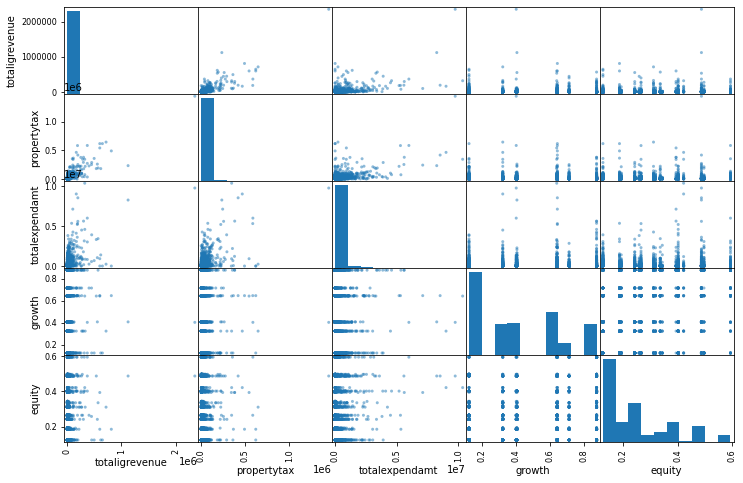

In [18]:
#Scatter of Financing
scatter_matrix(df1[FinanceAttrib], figsize= (12, 8));

array([[<AxesSubplot:title={'center':'ginitx'}>]], dtype=object)

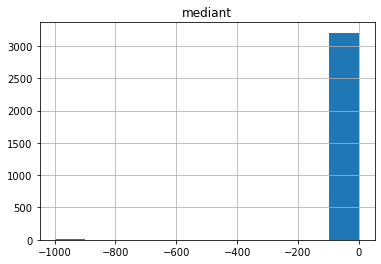

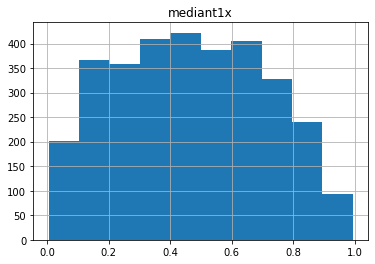

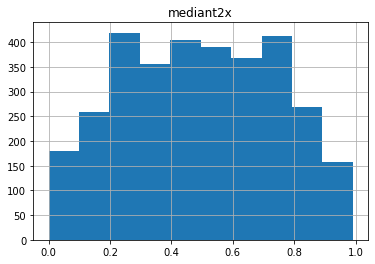

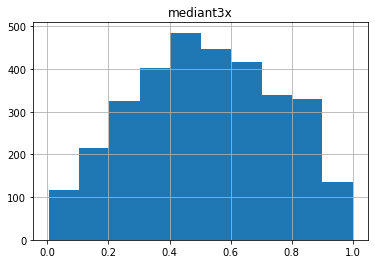

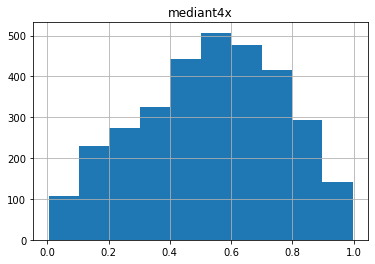

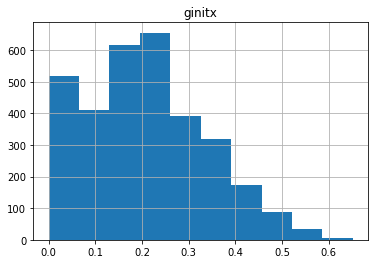

In [19]:
#Social need variables
df1[['mediant']].hist()
df1[['mediant1x']].hist()
df1[['mediant2x']].hist()
df1[['mediant3x']].hist()
df1[['mediant4x']].hist()
df1[['ginitx']].hist()

In [20]:
#I recognize that there are some issues here if I want to use these data in analyses
#MedianT should never be below zero.  So, I am going to have to drop some of these values.
df2= df1[df1.mediant< 0]
df2.shape

(8, 52)

In [21]:
#Seeing that it is just 8 values of 3,213 I am okay dropping in the main set.  But, later I may want to see why this happened.
#I change the direction, because now I want to keep those values above 0.
df1= df1[df1.mediant> 0]
df1.shape

(3205, 52)

Let's now take a look at the distribution of the CDBG Variables
From this, I recognize that all cases which actually do not receive CDBG values are zero.  This suggests that maybe
I should code these as missing instead of zero percent of the share of CDBG values. 

array([[<AxesSubplot:title={'center':'redistributive_es'}>]], dtype=object)

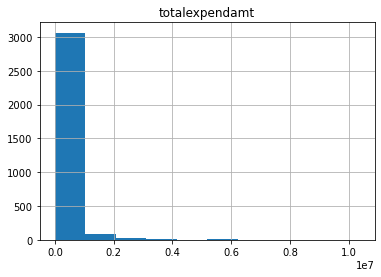

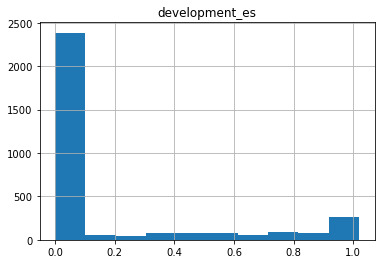

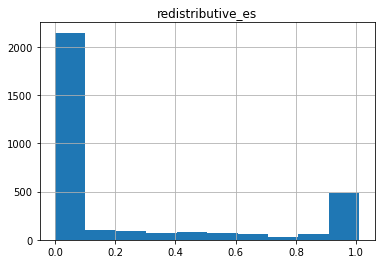

In [22]:
df1[['totalexpendamt']].hist()
df1[['development_es']].hist()
df1[['redistributive_es']].hist()

Given the heavy skew for the CDBG dollars (totalexpendamt), I need to transform that variable.  But taking the log
#would give me a faulty value.  So, I use the inverse hyperbolic sine function to overcome this.

array([[<AxesSubplot:title={'center':'LogCDBG'}>]], dtype=object)

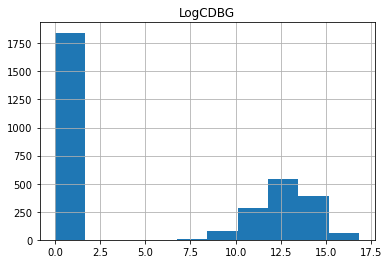

In [23]:
df1['LogCDBG']= np.arcsinh(df1['totalexpendamt'])
df1[['LogCDBG']].hist()

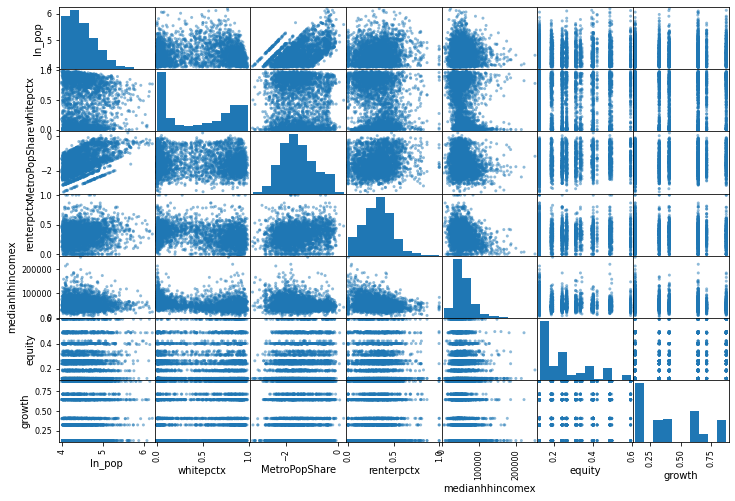

In [24]:
#Control variables
controlAttrib= ['ln_pop', 'whitepctx', 'MetroPopShare', 'renterpctx', 'medianhhincomex', 'equity', 'growth']
scatter_matrix(df1[controlAttrib], figsize= (12, 8)); #The ";" after the command ensures that the attrib text is removed


In [25]:
#Log this variable
df1['LogMedianHHIncome']= np.log10(df1['medianhhincomex'])

# Correlations and Variable Relationships

In this section, I begin to explore the interrelationship between my variables that will allow me to generate a set of testable hypotheses. 

In [26]:
#In a regression model, I know that these independent variables may be problematic if they are too highly correlated.  That may violate 
# assumptions of multicollinearity.  Therefore, I conduct a correlation matrix.
#I borrow the idea for this map here: https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607

corr= df1[['LogCDBG', 'development_es', 'redistributive_es', "mediant1x", "mediant2x", "mediant3x", "mediant4x", 'mediant', 'ginitx', 
	'hfrag2', 'hfragsimple', 'vfrag', 'LogPop', 'MetroPopShare', 'RevOwnPerCapita', 'LogPropTax', "renterpctx", 'IGRrevPerCapita','LogMedianHHIncome', 
	'private_participate', 'public_participate','whitepctx', 'belowpovertypctx']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,LogCDBG,development_es,redistributive_es,mediant1x,mediant2x,mediant3x,mediant4x,mediant,ginitx,hfrag2,hfragsimple,vfrag,LogPop,MetroPopShare,RevOwnPerCapita,LogPropTax,renterpctx,IGRrevPerCapita,LogMedianHHIncome,private_participate,public_participate,whitepctx,belowpovertypctx
LogCDBG,1.00,0.65,0.67,0.18,-0.01,0.26,0.10,0.13,0.06,-0.17,-0.12,0.24,0.57,0.28,0.12,0.40,0.10,0.07,-0.04,0.07,0.07,0.01,0.20
development_es,0.65,1.00,-0.07,0.13,0.03,0.12,0.08,0.09,0.00,-0.05,-0.07,0.13,0.26,0.15,0.06,0.16,0.06,0.02,-0.03,0.03,0.07,0.03,0.15
redistributive_es,0.67,-0.07,1.00,0.06,-0.06,0.21,0.03,0.05,0.09,-0.17,-0.09,0.19,0.41,0.16,0.08,0.31,0.06,0.05,0.00,0.05,0.02,-0.02,0.07
mediant1x,0.18,0.13,0.06,1.00,0.67,0.43,0.67,0.80,-0.58,-0.02,0.02,0.08,0.14,0.30,0.12,0.00,0.22,0.07,-0.30,0.12,0.21,0.00,0.71
mediant2x,-0.01,0.03,-0.06,0.67,1.00,0.24,0.50,0.65,-0.50,0.05,0.04,-0.01,-0.07,0.17,0.06,-0.14,0.11,0.05,-0.25,0.07,0.17,0.02,0.46
mediant3x,0.26,0.12,0.21,0.43,0.24,1.00,0.39,0.49,-0.28,-0.17,-0.10,0.20,0.32,0.10,0.04,0.19,0.16,-0.00,-0.11,0.06,0.07,-0.11,0.27
mediant4x,0.10,0.08,0.03,0.67,0.50,0.39,1.00,0.70,-0.56,0.04,0.08,0.07,0.02,0.26,0.14,-0.05,0.19,0.05,-0.19,0.12,0.18,-0.05,0.55
mediant,0.13,0.09,0.05,0.80,0.65,0.49,0.70,1.00,-0.56,-0.03,-0.02,0.10,0.10,0.22,0.10,0.01,0.15,0.05,-0.24,0.10,0.17,0.00,0.57
ginitx,0.06,0.00,0.09,-0.58,-0.50,-0.28,-0.56,-0.56,1.00,-0.05,-0.03,-0.03,0.21,-0.04,-0.00,0.23,-0.13,0.07,0.20,-0.03,-0.09,0.01,-0.39
hfrag2,-0.17,-0.05,-0.17,-0.02,0.05,-0.17,0.04,-0.03,-0.05,1.00,0.40,-0.32,-0.22,0.19,-0.05,-0.16,-0.00,-0.05,-0.06,-0.00,0.04,0.02,0.04


<AxesSubplot:title={'center':'revenue as a function of population'}, xlabel='populationx', ylabel='totalrevownsources'>

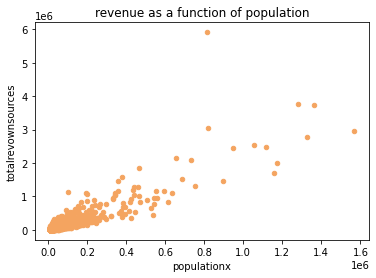

In [27]:
#Looks like a strong correlation between total revenues and population, can visualize another way.
#Idea from here: https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607

df1.plot.scatter(x = 'populationx', y = 'totalrevownsources',
                  color = 'sandybrown', title = 'revenue as a function of population')

# Explore Time Dimension of Resources

My data are considered panel data, therefore I explore the time dimension of own-source resources and CDBG investments.  

In [28]:
#I also have data over time, so it might be interesting to look at it this way.
df_year = df1[['year','totalrevownsources']].groupby('year').sum()
df_year.reset_index(inplace = True)

df_yearCDBG= df1[['year','totalexpendamt']].groupby('year').sum()
df_yearCDBG.reset_index(inplace=True)

<AxesSubplot:title={'center':'revenue as a function of population'}, xlabel='LogPop', ylabel='RevOwnPerCapita'>

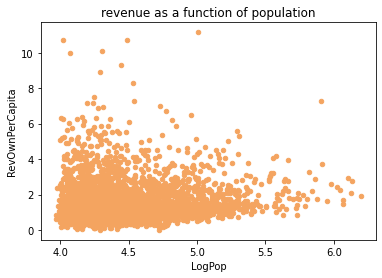

In [29]:
df1.plot.scatter(x = 'LogPop', y = 'RevOwnPerCapita',
                  color = 'sandybrown', title = 'revenue as a function of population')

<AxesSubplot:title={'center':'Total CDBG expenditures (raw form)'}, xlabel='LogPop', ylabel='totalexpendamt'>

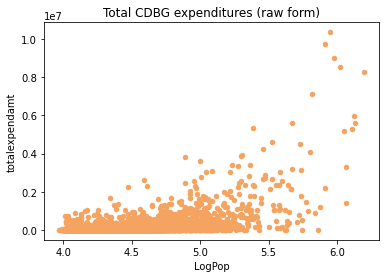

In [30]:
df1.plot.scatter(x = 'LogPop', y = 'totalexpendamt',
                  color = 'sandybrown', title = 'Total CDBG expenditures (raw form)')

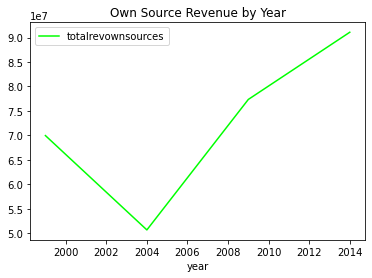

In [31]:
RevByYear = df_year.plot.line(x = 'year', y = 'totalrevownsources', color = 'lime', title="Own Source Revenue by Year")

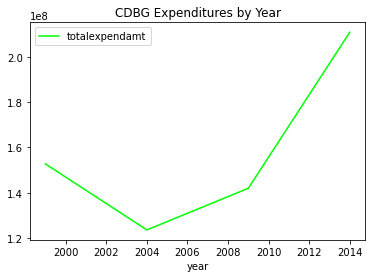

In [32]:
CDBGByYear = df_yearCDBG.plot.line(x = 'year', y = 'totalexpendamt', color = 'lime', title="CDBG Expenditures by Year")

# Models

In this section I begin to analyze the data to explain local decisions with respect to economic growth and equity-oriented policies. 

This is guided by the following hypotheses that I seek to test.


**HYPOTHESES**

The first hypothesis suggests that municipal-level social need (variable= mediant) will increase the likelihood that equity-oriented economic development policies will be used at the local level. 

**Hypothesis 1a: Greater municipal-level social need will increase the likelihood of offering equity-enhancing economic development policies.**

**Hypothesis 1b: Greater municipal-level social need will decrease the likelihood of offering equity-enhancing economic development policies.**



## Model 1: Bivariate Regression 

In the first stage of the model, I test the impact of median social need on committment to equity-oriented policies.  

In [33]:
#Now I want to see the impact of these same variables on equity.
model1equity= smf.ols(formula= "equity~ mediant", data=df1).fit()
print(model1equity.summary())

                            OLS Regression Results                            
Dep. Variable:                 equity   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     148.1
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           2.45e-33
Time:                        11:21:46   Log-Likelihood:                 1919.3
No. Observations:                3205   AIC:                            -3835.
Df Residuals:                    3203   BIC:                            -3822.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1882      0.005     35.142      0.0

### Results from Model 1

I see that my social need measure has a significant impact on committments toward social equity; however, my model likely suffers from omitted variable bias.  Thus, I seek to improve my model by including a set of control factors that I believe impact equity-oriented outcomes as well. 

# Model 2: Multivariate Regression

In this model I include a set of controls to account for possible omitted variable bias.  In the earlier stage, I ensured multicollinearity would not be a problem.  

In [34]:
#Now I want to see the impact of these same variables on equity.
model2equity= smf.ols(formula= "equity~ mediant+ LogCDBG+ development_es+ redistributive_es+ ginitx+ hfrag2 + vfrag+ LogPop+RevOwnPerCapita+ IGRrevPerCapita+LogMedianHHIncome+ private_participate+ public_participate +C(ufog)", data=df1).fit()
print(model2equity.summary())

                            OLS Regression Results                            
Dep. Variable:                 equity   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     32.85
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           8.86e-99
Time:                        11:21:46   Log-Likelihood:                 2105.6
No. Observations:                3205   AIC:                            -4175.
Df Residuals:                    3187   BIC:                            -4066.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1901    

### Result from Model 2

I see from model 2 that social need remains statistically significantly related; however, the magnitude of the effect is mitigated once we account for CDBG expenditures and distributions, within variation of social need (ginitx), competition with other local governments (hfrag2 and vfrag), the government's own resources and other intergovernmental transfers (RevOwnPerCapita, IGRevPerCapita), median income, form of government (UFOG) and private and public sector actors in the participatory process.  



## Hypothesis 2

Hypothesis 2 suggests that social need matters, but it matters more in terms of variation within the municipality rather than between them.  Thus, while cities will have different levels of median social need (as measured by CDC)- they will also have different levels within a city (e.g. Fells Point within Baltimore is very different than Sandtown-Winchester within Baltimore). 

**Hypothesis 2: Greater inequality in social need within the municipality will increase the propensity for equity-enhancing economic development policies.** 

In [35]:
#Just for fun, let's run a little OLS regression model
#Information on statsmodels is here: https://www.statsmodels.org/stable/index.html

model3equity= smf.ols(formula= "equity~ mediant+ ginitx", data=df1).fit()
print(model3equity.summary())

                            OLS Regression Results                            
Dep. Variable:                 equity   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     74.33
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           2.80e-32
Time:                        11:21:46   Log-Likelihood:                 1919.6
No. Observations:                3205   AIC:                            -3833.
Df Residuals:                    3202   BIC:                            -3815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1822      0.009     19.245      0.0

## Results of Model 3

I would normally want to take account for other variables in this model; however, from model 2 I noticed that the inequities in social need within the unit (variation in tract-level social need) did not show up significant.  This holds in a simple test between the two variables.  But, I might look at the interaction between within city variation in social need (ginitx) and between city variation in social need (mediant).  

In [36]:
#Just for fun, let's run a little OLS regression model
#Information on statsmodels is here: https://www.statsmodels.org/stable/index.html

model4equity= smf.ols(formula= "equity~ mediant*ginitx", data=df1).fit()
print(model4equity.summary())

                            OLS Regression Results                            
Dep. Variable:                 equity   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     55.42
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           6.39e-35
Time:                        11:21:46   Log-Likelihood:                 1928.0
No. Observations:                3205   AIC:                            -3848.
Df Residuals:                    3201   BIC:                            -3824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2101      0.012     18.

### Refine this model

I now see if this result holds when I control for other variables.

In [37]:
model5equity= smf.ols(formula= "equity~ mediant*ginitx+ LogCDBG+ development_es+ redistributive_es+ hfrag2 + vfrag+ LogPop+RevOwnPerCapita+ IGRrevPerCapita+LogMedianHHIncome+ private_participate+ public_participate +C(ufog)", data=df1).fit()
print(model5equity.summary())

                            OLS Regression Results                            
Dep. Variable:                 equity   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     31.23
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           1.02e-98
Time:                        11:21:47   Log-Likelihood:                 2107.3
No. Observations:                3205   AIC:                            -4177.
Df Residuals:                    3186   BIC:                            -4061.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2089    

## Results for Model 5

I find that the interaction between the two leads both to be positive and significant, suggesting that between and within variation in social need may help us understand why local governments pursue social equity policies. 

#I want to visualize the partial regression effect of horizontal fragmentation after controllling for other variables


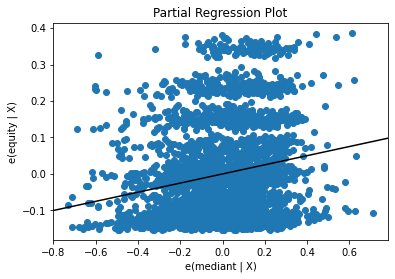

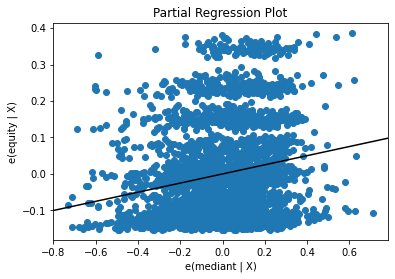

In [38]:
#Idea for such a visualization is from here: https://www.statsmodels.org/stable/gettingstarted.html
sm.graphics.plot_partregress(endog='equity', exog_i='mediant', exog_others=['ginitx', 'hfrag2', 'vfrag'],
                                data=df1, obs_labels=False)



In [39]:
#I now want to compare my first model to the more refined models

anova= anova_lm(model1equity, model2equity, model5equity)
print(anova.round(4))

   df_resid      ssr  df_diff  ss_diff        F  Pr(>F)
0    3203.0  56.6513      0.0      NaN      NaN     NaN
1    3187.0  50.4328     16.0   6.2185  24.5783  0.0000
2    3186.0  50.3800      1.0   0.0528   3.3399  0.0677


## Anova Result

From this, I see that my third model is a significant improvement upon the second.  Though, this was also established through the model fit above.  My third model explained roughly 15% of the variation in equity, compared to just 5% in the full model.  Thus, the interaction effect of different dimensions of social equity is a powerful predictor of these differences. 

# Machine Learning Techniques

## Purpose of Machine Learning Results

I'm using the machine learning model to explore whether I can improve our understanding of why some governments use particular types of economic development policies oriented toward growth (Tax Abatements) or Equity (Community Development Loans).  I will do my best to improve overall model fit and begin to explore the variables explaining utilization of these policies. 

I do rely a bit heavily on: https://medium.com/@vaibhavpaliwal/comparing-machine-learning-algorithms-on-a-single-dataset-classification-46ffc5d3f278 as I am not familiar with how to structure these analyses in Python and am generally new to the area.  However, I adapt for my own purposes as needed. 

In [40]:
# Import normal machine learning techniques
# Ideas from Data Science Programming for Dummies (Mueller and Masron); others on PCA from https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/

#Here are some of the packages to compare models, split them, visualize their comparisons, etc.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler


#Now the models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Regression-based models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Warnings
import warnings
warnings.filterwarnings("ignore")


In [41]:
df2=df1.drop(['post', 'treated', 'didnew', 'diddosage'], axis=1)

for i in df2.columns:
    print(i)

year
imisid
ujuris
ustate
hfrag2
hfragsimple
vfrag
whitepctx
blackpctx
belowpovertypctx
mediant1x
mediant2x
mediant3x
mediant4x
mediant
ginitx
ufog
ta
tc
tif
training
cdc
cdloan
childcare
growth
equity
populationx
ln_pop
metropop
totalrevownsources
totrevpercap
propertytax
renterpctx
totaligrevenue
medianhhincomex
totalexpendamt
development_es
redistributive_es
totalexpenditure
all_participate
private_participate
public_participate
RevOwnPerCapita
IGRrevPerCapita
LogPop
LogPropTax
LogMetroPop
MetroPopShare
LogCDBG
LogMedianHHIncome


In [42]:
# Copy to the third df
df3=df2

# shift column 'C' to first position
first_column = df3.pop('ta')
second_column= df3.pop('cdloan')

# insert columns using insert(position,column_name,first_column) function
df3.insert(0, 'ta', first_column)
df3.insert(1, 'cdloan', second_column)

#Now I create nominal/ordinal variables that can be used with the machine learning algorithms
df3['ta'] = df['ta'].replace({1: 'ta', 0: 'no'})
df3['cdloan'] = df['cdloan'].replace({1: 'cdloan', 0: 'no'})

df3

,ta,cdloan,year,imisid,ujuris,ustate,hfrag2,hfragsimple,vfrag,whitepctx,...,private_participate,public_participate,RevOwnPerCapita,IGRrevPerCapita,LogPop,LogPropTax,LogMetroPop,MetroPopShare,LogCDBG,LogMedianHHIncome
0,no,no,1999,101641,Town of Ashland,25,0.982268,0.870733,0.448276,0.025341,...,0.153670,0.050671,2.332061,0.408894,4.081563,4.369103,5.795586,-1.714023,0.000000,4.851955
1,no,no,2009,101641,Town of Ashland,25,0.994200,0.793913,0.230769,0.908071,...,0.061293,0.101218,3.116651,1.999738,4.198849,4.559071,5.849112,-1.650263,0.000000,4.770404
2,no,no,2014,101661,Town of Concord,25,0.986480,0.030186,0.718284,0.851622,...,0.226379,0.200716,2.680643,0.194037,4.251297,4.242066,5.626828,-1.375530,0.000000,4.703695
3,no,no,1999,102072,Town of Mansfield,25,0.983130,1.187969,0.307692,0.042015,...,0.061293,0.050671,4.242245,0.784947,4.219270,4.555079,5.461610,-1.242339,0.000000,4.558094
4,ta,cdloan,2014,102072,Town of Mansfield,25,0.986490,0.301076,0.352941,0.822598,...,0.153670,0.244645,1.331290,0.279516,4.365713,4.092213,5.888768,-1.523056,0.000000,4.710320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,no,no,2014,714679,Township of Olmsted,39,0.974410,0.489493,0.533333,0.681174,...,0.061293,0.200716,0.329505,0.226507,4.127364,3.532754,6.289412,-2.162048,0.000000,4.784393
3209,ta,cdloan,2014,714769,Township of Perkins,39,0.987318,0.257191,0.450000,0.759250,...,0.061293,0.021054,0.464324,0.205004,4.084612,3.625827,6.359544,-2.274932,0.000000,4.660423
3210,ta,no,2014,715179,Township Of Stroud,42,0.982511,0.375815,0.465385,0.910882,...,0.153670,0.154353,0.436449,0.041760,4.283414,3.573684,5.608520,-1.325105,0.000000,4.753959
3211,no,no,2014,715286,Township Of Union,39,0.984734,0.968966,0.375000,0.519150,...,0.061293,0.021054,0.072508,0.029707,4.125936,2.770115,5.604351,-1.478415,0.000000,4.839257


In [43]:
# I want to see how many local governments use tax abatements 
df3['ta'].value_counts()

no    1813
ta    1392
Name: ta, dtype: int64

In [44]:
# Split-out validation dataset
array = df3.values

#For Tax abatements
X = array[:,6:42] #This command effectively assigns the array values starting with variables I want in my model as Xs
y = array[:,0] #This ensures that I am capturing all observations for the dependent variable tax abatement
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1) #This splits my sample randomly holding 80% for training and 20% for validation. #random state seeds this to get the same split every time.

In [45]:
#first, I want to make sure I have accurate sample sizes

X_train.shape, X_validation.shape,  Y_train.shape, Y_validation.shape

((2564, 36), (641, 36), (2564,), (641,))

In [46]:
#I want to make sure these values are correct.
print(Y_train)

['no' 'no' 'no' ... 'no' 'no' 'ta']


In [47]:
#I want to take a look and make sure I am not including any of the identifier information.  
print(X)

[[0.98226774 0.8707332 0.44827586 ... 0.29290628 0.15366971 0.050670501]
 [0.99419987 0.79391348 0.23076923 ... 0.28613403 0.061292775 0.10121775]
 [0.98648041 0.030185557999999998 0.71828359 ... 0.40836626 0.22637901
  0.20071603]
 ...
 [0.98251051 0.37581529999999996 0.4653846 ... 0.32582709 0.15366971
  0.15435323]
 [0.98473352 0.96896631 0.375 ... 0.18599102 0.061292775
  0.021054022000000002]
 [0.99458152 0.43375289 0.51612902 ... 0.30848813 0.061292775 0.23106411]]


In [48]:
##Tax Abatement Models

# I want to place each of my models into a list for cross-comparison
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#Notably, I add a random forest ensemble method of a series of decision trees- which we will see performs quite well.
models.append(('RFC', RandomForestClassifier(max_depth=5, n_estimators=40)))

# evaluate each model in turn. I save the results and names of the models into lists.
results = []
names = []

#I'm literally now looping through all of my models.  This replaces having to perform this action time and time again.
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #Kfold validation with 10 splits is appropriate.  This will improve upon simple linear models above and protect against overfitting.
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') #Here is the crossvalidation score, I will look closely at this.
	results.append(cv_results) #I'm appending for each model
	names.append(name) #I'm including the name of the model
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) #Here I print out the results with the mean CV and the SD.

LR: 0.565142 (0.008798)
LDA: 1.000000 (0.000000)
KNN: 0.576438 (0.020088)
CART: 1.000000 (0.000000)
NB: 0.519539 (0.039288)
SVM: 0.567862 (0.001439)
RFC: 0.974640 (0.011222)


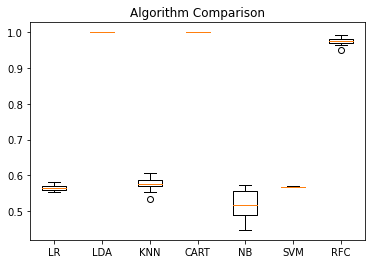

In [49]:
# Compare Algorithms for tax abatements
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

I can see from the results here that LDA and CART are likely overfitting as they are perfectly predicting.  This would seem great, but it is unlikely to hold up under a validation model.  Thus, RFC would seem to be the strongest performer and would provide the greatest assurances in results. 

In [50]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [51]:
# Evaluate predictions overall
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5569422776911076
[[357   0]
 [284   0]]
              precision    recall  f1-score   support

          no       0.56      1.00      0.72       357
          ta       0.00      0.00      0.00       284

    accuracy                           0.56       641
   macro avg       0.28      0.50      0.36       641
weighted avg       0.31      0.56      0.40       641



In [52]:
# Evaluate predictions by model for tax abatement
for name, model in models:
    model.fit(X_train, Y_train)
    predictions= model.predict(X_validation)
    print("Now, onto model fit for validation")
    model.fit(X_validation, Y_validation)
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

Now, onto model fit for validation
LR
0.5553822152886115
[[351   6]
 [279   5]]
              precision    recall  f1-score   support

          no       0.56      0.98      0.71       357
          ta       0.45      0.02      0.03       284

    accuracy                           0.56       641
   macro avg       0.51      0.50      0.37       641
weighted avg       0.51      0.56      0.41       641

Now, onto model fit for validation
LDA
1.0
[[357   0]
 [  0 284]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       357
          ta       1.00      1.00      1.00       284

    accuracy                           1.00       641
   macro avg       1.00      1.00      1.00       641
weighted avg       1.00      1.00      1.00       641

Now, onto model fit for validation
KNN
0.5616224648985959
[[223 134]
 [147 137]]
              precision    recall  f1-score   support

          no       0.60      0.62      0.61       357
          

Text(0.5, 15.0, 'Tax Abatement Prediction')

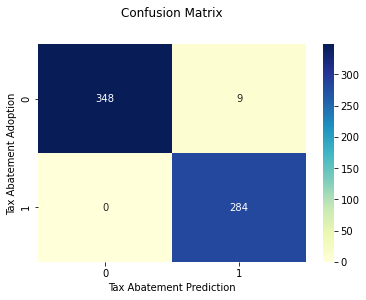

In [53]:
#It is worth exploring the confusion matrix to determine our models success
# I get this idea from: https://medium.com/@vaibhavpaliwal/comparing-machine-learning-algorithms-on-a-single-dataset-classification-46ffc5d3f278

#Now, I build in the values
confusion_m= metrics.confusion_matrix(Y_validation, predictions) #This stores the prediction data, which we will label the matrix with
p=sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap= 'YlGnBu', fmt= 'g') #Much of this is formatting the color and form of the matrix
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Tax Abatement Adoption')
plt.xlabel('Tax Abatement Prediction')

In [54]:
# I can use an ensemble technique called a voting classifier to see pool the strengths of the models.  IN reality, right now the random forest is pretty solid.

from sklearn.ensemble import VotingClassifier

ensemble= VotingClassifier(estimators= models, voting= 'hard', n_jobs= -1)
ensemble.fit(X_train, Y_train)
predictions= ensemble.score(X_validation, Y_validation)*100
print("The Voting Classifier Accuracy is: ", predictions)

The Voting Classifier Accuracy is:  93.44773790951638


## Community Development Loan (Equity- Focus)

In [55]:
# I want to see how many local governments use CD Loans
df3['cdloan'].value_counts()

no        2192
cdloan    1013
Name: cdloan, dtype: int64

In [56]:
# Split-out validation dataset
array = df3.values

#For CD Loans
X2 = array[:,6:42] #This command effectively assigns the array values starting with variables I want in my model as Xs
y2 = array[:,1] #This ensures that I am capturing all observations for the dependent variable tax abatement
X2_train, X2_validation, Y2_train, Y2_validation = train_test_split(X2, y2, test_size=0.20, random_state=1) #This splits my sample randomly holding 80% for training and 20% for validation

In [57]:
#first, I want to make sure I have accurate sample sizes

X2_train.shape, X2_validation.shape,  Y2_train.shape, Y2_validation.shape

((2564, 36), (641, 36), (2564,), (641,))

In [58]:
#I want to make sure these values are correct.
print(Y2_train)

['no' 'no' 'cdloan' ... 'cdloan' 'no' 'cdloan']


In [59]:
#I want to take a look and make sure I am not including any of the identifier information.  
print(X2)

[[0.98226774 0.8707332 0.44827586 ... 0.29290628 0.15366971 0.050670501]
 [0.99419987 0.79391348 0.23076923 ... 0.28613403 0.061292775 0.10121775]
 [0.98648041 0.030185557999999998 0.71828359 ... 0.40836626 0.22637901
  0.20071603]
 ...
 [0.98251051 0.37581529999999996 0.4653846 ... 0.32582709 0.15366971
  0.15435323]
 [0.98473352 0.96896631 0.375 ... 0.18599102 0.061292775
  0.021054022000000002]
 [0.99458152 0.43375289 0.51612902 ... 0.30848813 0.061292775 0.23106411]]


In [60]:
# I want to place each of my models into a list for cross-comparison
models2 = []
models2.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models2.append(('LDA', LinearDiscriminantAnalysis()))
models2.append(('KNN', KNeighborsClassifier()))
models2.append(('CART', DecisionTreeClassifier()))
models2.append(('NB', GaussianNB()))
models2.append(('SVM', SVC(gamma='auto')))

#Notably, I add a random forest ensemble method of a series of decision trees- which we will see performs quite well.
models2.append(('RFC', RandomForestClassifier(max_depth=5, n_estimators=40)))

# evaluate each model in turn. I save the results and names of the models into lists.
results2 = []
names2 = []

#I'm literally now looping through all of my models.  This replaces having to perform this action time and time again.
for name2, model in models2:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #Kfold validation with 10 splits is appropriate.  This will improve upon simple linear models above and protect against overfitting.
	cv2_results = cross_val_score(model, X2_train, Y2_train, cv=kfold, scoring='accuracy') #Here is the crossvalidation score, I will look closely at this.
	results2.append(cv2_results) #I'm appending for each model
	names2.append(name2) #I'm including the name of the model
	print('%s: %f (%f)' % (name2, cv2_results.mean(), cv2_results.std())) #Here I print out the results with the mean CV and the SD.

LR: 0.685261 (0.009096)
LDA: 1.000000 (0.000000)
KNN: 0.654090 (0.027476)
CART: 1.000000 (0.000000)
NB: 0.676687 (0.016302)
SVM: 0.683308 (0.001279)
RFC: 0.978171 (0.018178)


In [61]:
# Make predictions on validation dataset for CD Loans
models2 = RandomForestClassifier(max_depth=5, n_estimators=40)
models2.fit(X2_train, Y2_train)
predictions2 = models2.predict(X2_validation)

In [62]:
# Evaluate predictions overall
print(accuracy_score(Y2_validation, predictions2))
print(confusion_matrix(Y2_validation, predictions2))
print(classification_report(Y2_validation, predictions2))

0.9859594383775351
[[201   0]
 [  9 431]]
              precision    recall  f1-score   support

      cdloan       0.96      1.00      0.98       201
          no       1.00      0.98      0.99       440

    accuracy                           0.99       641
   macro avg       0.98      0.99      0.98       641
weighted avg       0.99      0.99      0.99       641



Text(0.5, 15.0, 'Community Development Loan Prediction')

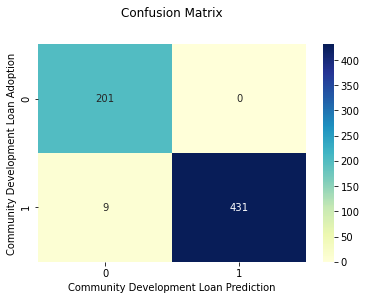

In [63]:
#It is worth exploring the confusion matrix to determine our models success
# I get this idea from: https://medium.com/@vaibhavpaliwal/comparing-machine-learning-algorithms-on-a-single-dataset-classification-46ffc5d3f278

#Now, I build in the values
confusion_m= metrics.confusion_matrix(Y2_validation, predictions2) #This stores the prediction data, which we will label the matrix with
p=sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap= 'YlGnBu', fmt= 'g') #Much of this is formatting the color and form of the matrix
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Community Development Loan Adoption')
plt.xlabel('Community Development Loan Prediction')

## Results

The model does an amazing job predicting instances of community development loan offerings. It has an accuracy of 98% on the validation set.  I want to now move to the broader category of social equity variables.  The social equity continuous variable was from a 2 stage Item Response Theory model (2pl) generated by a colleague in Stata.  I want to see how well I can predict the outcome variable (which is now continuous) given my set of predictors.  I will perform some additional prep work to reduce dimensionality in my factors (PCA) before using alternative models to explain the outcome variable. 

# Let's predict social equity after some additional pre-process work.

In [64]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [65]:
m_data = df3

# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in m_data.columns:
    m_data[col] = encoder.fit_transform(m_data[col])


In [66]:
for col in m_data.columns:
    print(col)

ta
cdloan
year
imisid
ujuris
ustate
hfrag2
hfragsimple
vfrag
whitepctx
blackpctx
belowpovertypctx
mediant1x
mediant2x
mediant3x
mediant4x
mediant
ginitx
ufog
tc
tif
training
cdc
childcare
growth
equity
populationx
ln_pop
metropop
totalrevownsources
totrevpercap
propertytax
renterpctx
totaligrevenue
medianhhincomex
totalexpendamt
development_es
redistributive_es
totalexpenditure
all_participate
private_participate
public_participate
RevOwnPerCapita
IGRrevPerCapita
LogPop
LogPropTax
LogMetroPop
MetroPopShare
LogCDBG
LogMedianHHIncome


## Clean Up Variables for Machine Learing Stage

In this next stage, I drop some variables that are no longer needed, convert one into dummies, and then reorder some.

In [67]:
# Copy df 
m_data2=m_data

#Create list of variables to be removed
RemoveThese= ['ln_pop', 'hfragsimple','mediant1x', 'mediant2x', 'mediant3x', 'mediant4x']

#Now I move each of these because cdloan, training, cdc, and childcare were used in the construction of equity IRT.
MoveCol(m_data2, 'training')
MoveCol(m_data2, 'cdc')
MoveCol(m_data2, 'childcare')
MoveCol(m_data2, 'cdloan')
MoveCol(m_data2, 'equity')

#FOG is actually a dummy variable, there is a simple command in pandas to handle this.
m_data3= pd.get_dummies(m_data2, columns=['ufog'])

#What I will be dropping in the next step.  These variables are no longer needed.
list= ['ln_pop', 'hfragsimple','mediant1x', 'mediant2x', 'mediant3x', 'mediant4x']

for i in list:
    m_data3.pop(i)

#Now I check to make sure that these print out in the right order, reversing the order I just inputted these (childcare, cdc, training...)
for col in m_data3.columns:
    print(col)

equity
cdloan
childcare
cdc
training
ta
year
imisid
ujuris
ustate
hfrag2
vfrag
whitepctx
blackpctx
belowpovertypctx
mediant
ginitx
tc
tif
growth
populationx
metropop
totalrevownsources
totrevpercap
propertytax
renterpctx
totaligrevenue
medianhhincomex
totalexpendamt
development_es
redistributive_es
totalexpenditure
all_participate
private_participate
public_participate
RevOwnPerCapita
IGRrevPerCapita
LogPop
LogPropTax
LogMetroPop
MetroPopShare
LogCDBG
LogMedianHHIncome
ufog_0
ufog_1
ufog_2
ufog_3
ufog_4


In [68]:
#This determines which of the variables will be used for my PCA.  I want to reduce the data, so this data reduction technique helps to ensure a more efficient model without multicollinearity.

X_features = m_data3.iloc[:,10:48] #This excludes variables used in generating equity in data prep, and also city names and year
y_label = m_data3.iloc[:, 0] #This makes sure that y_label is equity

In [69]:
# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

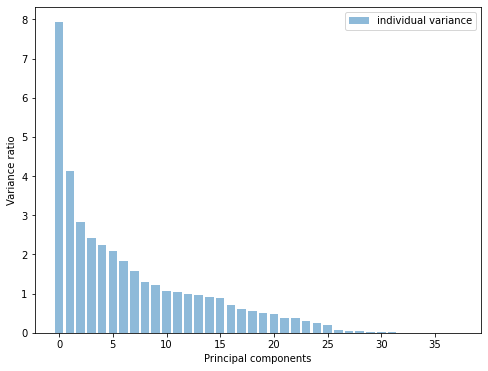

In [70]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(38), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

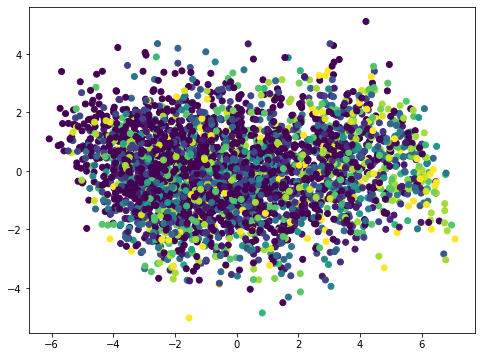

In [71]:
#Now I create a PCA using the 21 components.  
pca2 = PCA(n_components=21) #Roughly 21 components explain about 95% of all variation. 
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

#I create a visualization to see how well the model performs.  There is still a lot going on here and very little systematic patterns.
plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,5], c=m_data3['equity'])
plt.show()

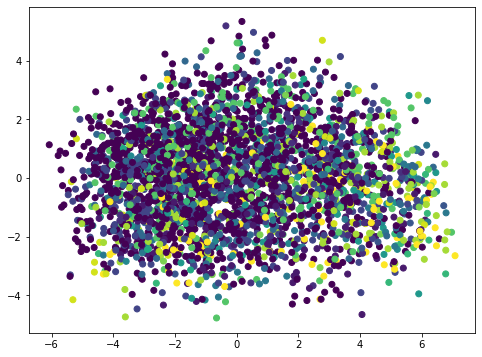

In [72]:
#There were too many components in the last stage. 
pca3 = PCA(n_components=3)
pca3.fit(X_features)
x_3d = pca3.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,2], c=m_data3['equity'])
plt.show()

In [73]:
#Now I create a dataframe and make sure there are no issues with the shape of each to merge them.
pcaData= pd.DataFrame(data= x_3d, columns= ['PCA 1', 'PCA 2', 'PCA 3'])
pcaData.shape, m_data3.shape

((3205, 3), (3205, 48))

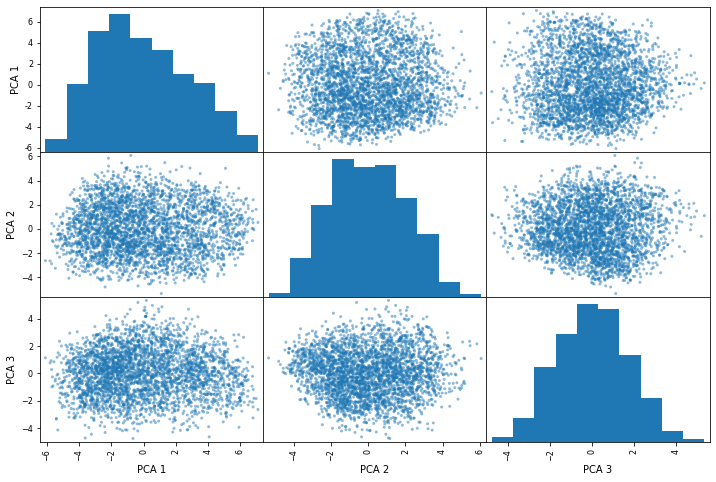

In [74]:
attributes= ["PCA 1", "PCA 2", "PCA 3"]

scatter_matrix(pcaData[attributes], figsize= (12, 8));

# Regression-Based ML Models

In this section, I build on the previous work to analyze greater committments to social equity using regression-based models rather than those aimed at deciding between two discrete outcomes.

In [75]:
#Revert back to earlier data, I opted against the PCA approach since I want to know the respective impact of each variable and variable importance.
df5=m_data3

#Move some columns
MoveCol(df5, 'tc')
MoveCol(df5, 'tif')
MoveCol(df5, 'growth')
MoveCol(df5, 'equity')

# Split-out validation dataset
array = df5.values #Now this is a numpy array
array_col= df5.columns #Want to store the columns

#Display
for i in df5.columns:
    print(i)


equity
growth
tif
tc
cdloan
childcare
cdc
training
ta
year
imisid
ujuris
ustate
hfrag2
vfrag
whitepctx
blackpctx
belowpovertypctx
mediant
ginitx
populationx
metropop
totalrevownsources
totrevpercap
propertytax
renterpctx
totaligrevenue
medianhhincomex
totalexpendamt
development_es
redistributive_es
totalexpenditure
all_participate
private_participate
public_participate
RevOwnPerCapita
IGRrevPerCapita
LogPop
LogPropTax
LogMetroPop
MetroPopShare
LogCDBG
LogMedianHHIncome
ufog_0
ufog_1
ufog_2
ufog_3
ufog_4


In [76]:
#In this step, I need to grab the columns as well as the values and then split the data
XNew=df5.iloc[:,13:47]
yNew = df5.iloc[:,0]

Xlabel = XNew.columns
ylabel = df5['equity']

import sklearn.preprocessing as preprocessing

#I need to scale them so they are all on the same value system. Otherwise, when I do variable importance later I can't directly compare (I believe).
minmax= preprocessing.MinMaxScaler()
minmax.fit(XNew)
X_minmax= minmax.transform(XNew)
print(X_minmax)

#For Tax abatements
X_minmax = df5.iloc[:,13:47].values #This command effectively assigns the array values starting with variables I want in my model as Xs
y = df5.iloc[:,0].values #This ensures that I am capturing all observations for the dependent variable tax abatement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #This splits my sample randomly holding 80% for training and 20% for validation. #random state seeds this to get the same split every time.


[[0.45593036 0.32835821 0.15462611 ... 0.         1.         0.        ]
 [0.79325354 0.0641791  0.87790452 ... 0.         1.         0.        ]
 [0.53318825 0.71940299 0.76468103 ... 0.         0.         0.        ]
 ...
 [0.45919478 0.34776119 0.88550908 ... 0.         0.         0.        ]
 [0.50598477 0.23880597 0.42627799 ... 0.         0.         0.        ]
 [0.81610446 0.44328358 0.90705534 ... 0.         0.         0.        ]]


In [77]:
XNew.columns

Index(['hfrag2', 'vfrag', 'whitepctx', 'blackpctx', 'belowpovertypctx',
       'mediant', 'ginitx', 'populationx', 'metropop', 'totalrevownsources',
       'totrevpercap', 'propertytax', 'renterpctx', 'totaligrevenue',
       'medianhhincomex', 'totalexpendamt', 'development_es',
       'redistributive_es', 'totalexpenditure', 'all_participate',
       'private_participate', 'public_participate', 'RevOwnPerCapita',
       'IGRrevPerCapita', 'LogPop', 'LogPropTax', 'LogMetroPop',
       'MetroPopShare', 'LogCDBG', 'LogMedianHHIncome', 'ufog_0', 'ufog_1',
       'ufog_2', 'ufog_3'],
      dtype='object')

In [78]:
#Run the regression
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

#Take a look at the coefficient values

coeff_df = pd.DataFrame(lin_reg.coef_, Xlabel, columns=['Coefficient'])
coeff_df

ValueError: Shape of passed values is (36, 1), indices imply (34, 1)

In [ ]:
#Now I store the predicted values in a vector that I will build into a dataframe with the actual
y_pred=lin_reg.predict(X_test)

dfReg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfReg

In [ ]:
#Now I will view some of the fit metrics

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#I want to figure out variable importance in my models- Ideas from https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf
from sklearn.model_selection import GridSearchCV

#At this stage, I am tuning the hyperparamaters.  This can be done manually or I can let it search for optimal solution.
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

#I'm using a random for regressor- there are many other selections of models that I could use instead. 
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

#This gives a quick view of the best estimator
grid_search.best_estimator_


# Variable Importance

What I am most interested in was seeing variable importance.  Do the same variables hold as was the case in the regression models above? 


In [ ]:
#I do a grid search for the relative importance of each variable.
feature_importances = grid_search.best_estimator_.feature_importances_

#I then display them.
sorted(zip(feature_importances, Xlabel), reverse=True)

In [ ]:
#Now I execute this on the test set to see how the model performs

final_model= grid_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

In [ ]:
#Now I check the confidence intervals
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))


# Conclusion

Through this project I found that there is an important interaction effect that helps to explain why local governments would focus on equity-oriented economic development policies.  Past research had failed to adequately account for social need and vulnerability and there are two fundamental sources within local governments.  

First, there is between city-variation.  Baltimore's social need may be higher than Washington DC, but does that make Baltimore more likely to adopt equity-oriented policies?  This project tentatively says yes, but social need plays another role.

The second role that social need might play is through within city-variation.  Baltimore's Fells point neighborhood varies considerably with Sandtown-Winchester in terms of social need/vulnerability.  Does this disparity in social need lead governments to adopt equity-oriented policies?  This alone does not seem to have an impact; however, there is one pathway through which it does matter.

Third, the joint combination or moderating effect of within and between city-variation could matter.  My conclusion for this project is that cities like Baltimore may simultaneously be responsive not just to differences in the median tract-level social need with a city like DC, but it might consider the relative high and low-levels of tract social need when making this comparison.  The joint combination of the two factors vastly improved model fit.  This project accounted for many of the factors known to drive economic development decisions and yet these factors remained important.

Finally, I began to explore the utilization of machine learning models for both classificaiton and prediction using both supervised and unsupervised learning.  On this front, I barely scratched the surface and the models would need great tuning and preprocessing to get to the point where I was generating inferences from the data.  Further, I had to borrow heavily from other's work to perform these routines as this was a completely new area to me.  But, I learned a lot in the process and have a better understanding of where I will need to develop in 602.